In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix 
from scipy.spatial.distance import cdist 
from skimage.measure import label, regionprops, moments, moments_central, moments_normalized, moments_hu 
from skimage import io, exposure 
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle 
import pickle
import os
from train import read_binarize, normalize

In [2]:
img = io.imread('H1-16images/a.bmp')
print(img.shape)

(750, 600)


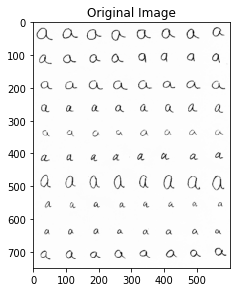

In [3]:
io.imshow(img)
plt.title('Original Image')
io.show()

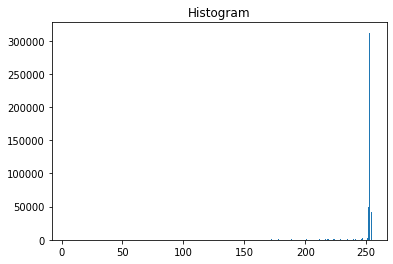

In [4]:
hist = exposure.histogram(img)
plt.bar(hist[1], hist[0])
plt.title('Histogram')
plt.show()

In [5]:
th = 200
img_binary = (img < th).astype(np.double)

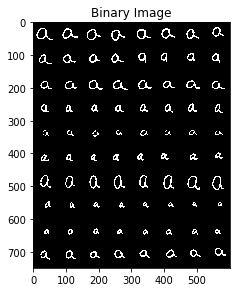

In [6]:
io.imshow(img_binary)
plt.title('Binary Image')
io.show()

In [7]:
img_label = label(img_binary, background=0)

/Users/advithchegu/.local/share/virtualenvs/Computer_Vision-j7KnroHV/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


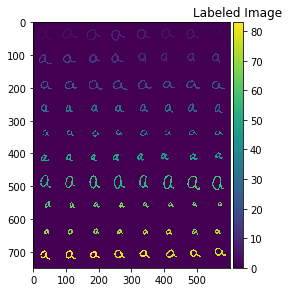

In [8]:
io.imshow(img_label)
plt.title('Labeled Image')
io.show()

In [9]:
print(np.amax(img_label))

83


In [10]:
#store the statistical information
features = []

In [11]:
# build training set
def build_set(minr, minc, maxr, maxc):
    roi = img_binary[minr:maxr, minc:maxc]
    m = moments(roi)
    cr = m[0, 1] / m[0, 0]
    cc = m[1, 0] / m[0, 0]
    center = (cr, cc)
    mu = moments_central(roi, center)
    nu = moments_normalized(mu)
    hu = moments_hu(nu)
    features.append(hu)

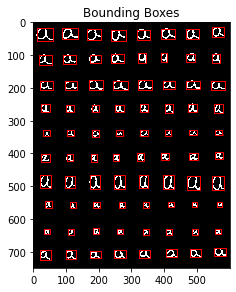

In [12]:
regions = regionprops(img_label)
io.imshow(img_binary)
ax = plt.gca()
for props in regions:
    minr, minc, maxr, maxc = props.bbox
    height = maxr - minr
    width = maxc - minc
    if width > 5 and height > 5:
        build_set(minr, minc, maxr, maxc)
    ax.add_patch(Rectangle((minc, minr), maxc - minc, maxr - minr, fill = False, edgecolor = 'red', linewidth = 1))
ax.set_title('Bounding Boxes')
io.show()

In [13]:
print("Height: ", len(features), "Width: ", len(features[0]))

Height:  80 Width:  7


In [14]:
# go through all the images and get all the features
features = {}
directory_name = './H1-16images/'
for file_name in os.listdir(directory_name):
    f = file_name.strip('.bmp')
    features[f] = read_binarize(directory_name + file_name, 200)

In [31]:
# gather all the moments
moments = []

# loop through the keys and normalize the distributions of the different features
for i in range(7):
    m = []
    for k in features.keys():
        image = features[k]
        for j,r in enumerate(image):
            m.append(image[j][i])
    moments.append(m)

# find mean and std dev
means = [np.mean(arr) for arr in moments]
std_devs = [np.std(arr) for arr in moments]

In [32]:
print(std_devs)

[6.393664990120478, 808.983819184656, 169647.03568575368, 242278.25464831473, 1790238295270.7373, 41151624.28648438, 196343239388.8905]
